<a href="https://colab.research.google.com/github/kristinak15/QM2-Group-4/blob/main/Mapping_United_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
!pip install geopandas

!pip install pysal 

!apt install libspatialindex-c4v5

In [98]:
!pip install descartes

In [99]:
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import pylab
import descartes

%matplotlib inline

plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (20., 16.)

In [100]:
!pip install mapclassify
import mapclassify

In [101]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [102]:
us_states = gp.read_file('/content/tl_2019_us_state.shp')

us_states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266231560,489271086,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138947364717,31362872853,+28.4574302,-082.4091477,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143779863817,6215723896,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206230065476,18942261495,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151726296,6979340970,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."


In [103]:
us_states.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

In [104]:
us_states['geometry'].head()

0    POLYGON ((-81.74725 39.09538, -81.74635 39.096...
1    MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ...
2    POLYGON ((-91.18529 40.63780, -91.17510 40.643...
3    POLYGON ((-96.78438 46.63050, -96.78434 46.630...
4    POLYGON ((-77.45881 39.22027, -77.45866 39.220...
Name: geometry, dtype: geometry

. original_crs is the latlon co-ordinates; target_crs is a mercator ('merc') projection; and the third line, to_crs projects the geometry so we can plot it

In [105]:
us_states.crs = {'init':'EPSG:4269'}
target_crs = {'datum':'NAD83', 'no_defs':True, 'proj':'merc'}


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


projected_londonWards = londonWards.to_crs(crs=target_crs) --> does not work

In [106]:
projected_us_states = us_states.to_crs(crs=target_crs)

In [107]:
us_states['NAME'].unique()

array(['West Virginia', 'Florida', 'Illinois', 'Minnesota', 'Maryland',
       'Rhode Island', 'Idaho', 'New Hampshire', 'North Carolina',
       'Vermont', 'Connecticut', 'Delaware', 'New Mexico', 'California',
       'New Jersey', 'Wisconsin', 'Oregon', 'Nebraska', 'Pennsylvania',
       'Washington', 'Louisiana', 'Georgia', 'Alabama', 'Utah', 'Ohio',
       'Texas', 'Colorado', 'South Carolina', 'Oklahoma', 'Tennessee',
       'Wyoming', 'Hawaii', 'North Dakota', 'Kentucky',
       'United States Virgin Islands',
       'Commonwealth of the Northern Mariana Islands', 'Guam', 'Maine',
       'New York', 'Nevada', 'Alaska', 'American Samoa', 'Michigan',
       'Arkansas', 'Mississippi', 'Missouri', 'Montana', 'Kansas',
       'Indiana', 'Puerto Rico', 'South Dakota', 'Massachusetts',
       'Virginia', 'District of Columbia', 'Iowa', 'Arizona'],
      dtype=object)

In [108]:
projected_us_states = us_states[(us_states['NAME']!='Hawaii')&(us_states['NAME']!='Alaska')&(us_states['NAME']!='Commonwealth of the Northern Mariana Islands')&(us_states['NAME']!='United States Virgin Islands')&(us_states['NAME']!='Guam')&(us_states['NAME']!='American Samoa')&(us_states['NAME']!='Puerto Rico')]

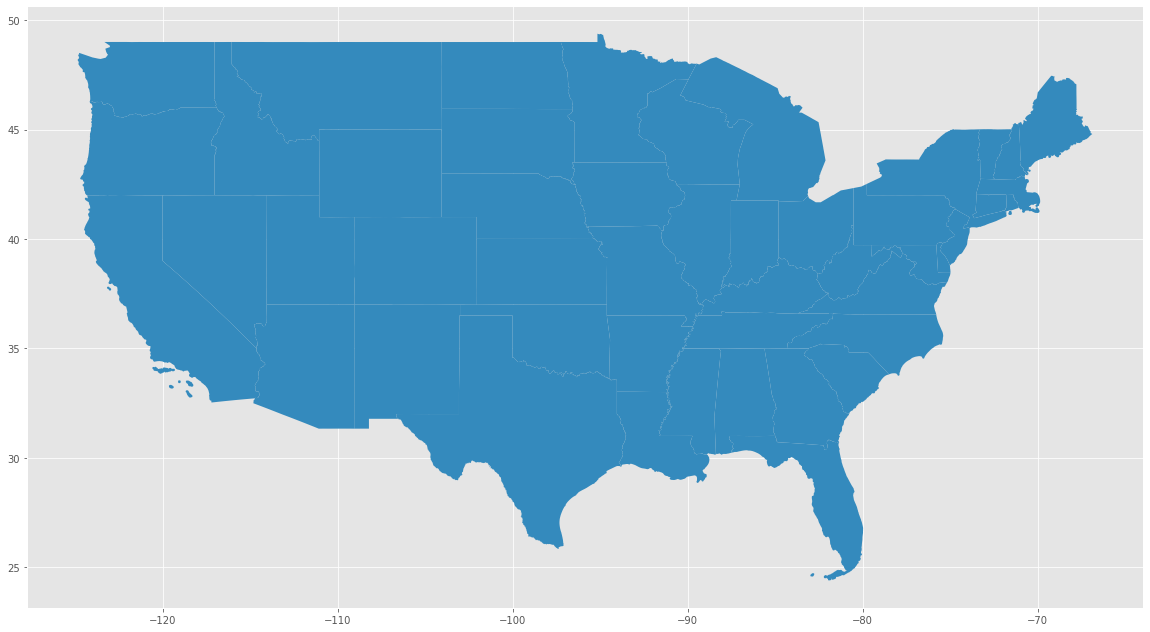

In [109]:
projected_us_states.plot()

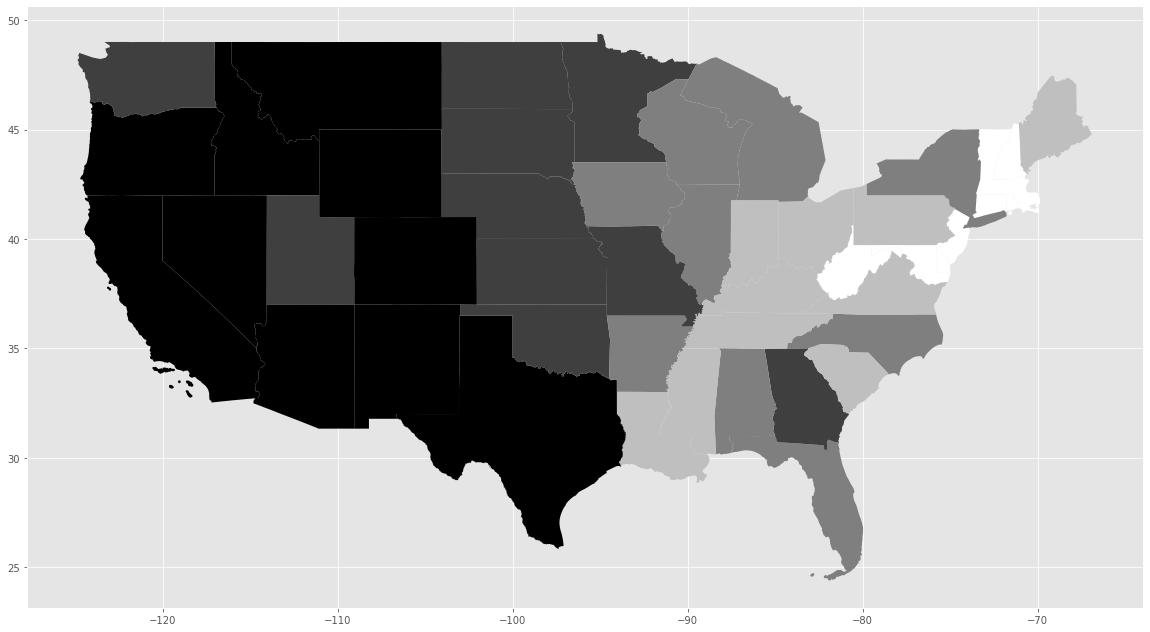

In [110]:
projected_us_states.plot(column='ALAND', cmap='binary', scheme='quantiles')

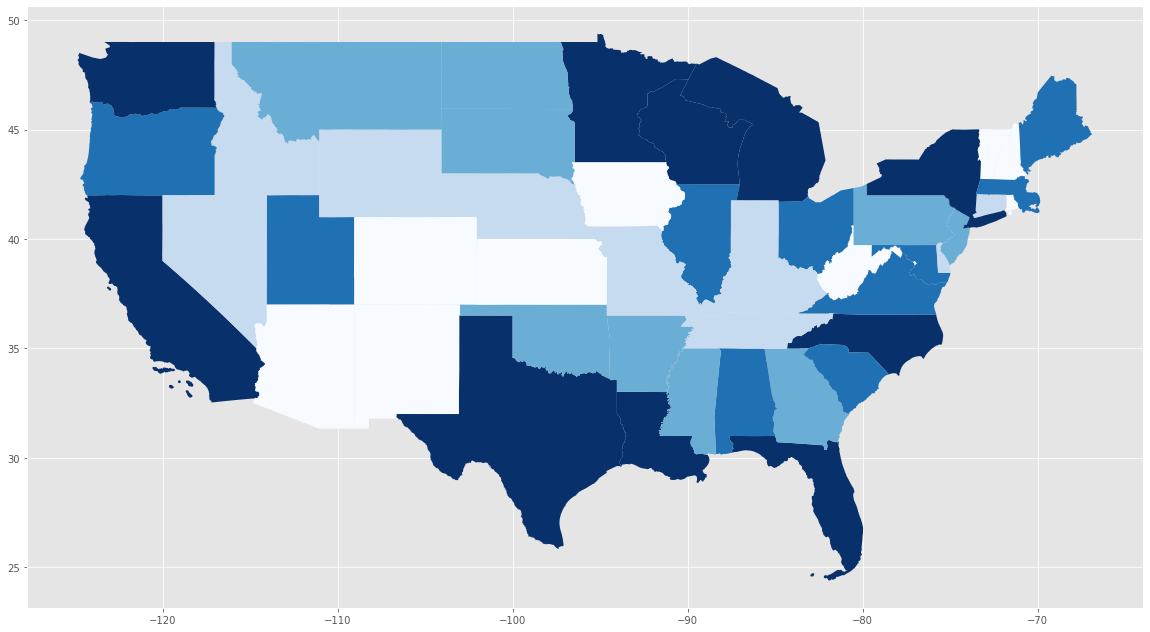

In [111]:
projected_us_states.plot(column='AWATER', cmap='Blues', scheme='quantiles')

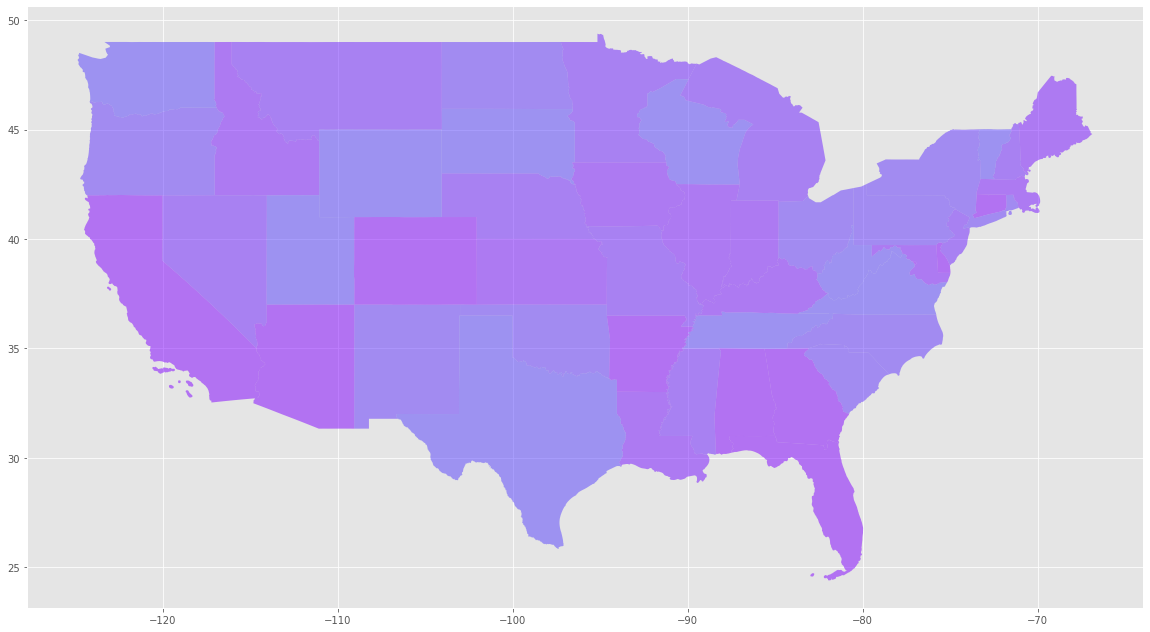

In [112]:
projected_us_states.plot(column='GEOID', cmap='rainbow', scheme='quantiles', alpha = 0.5)

In [113]:
!mkdir data
!curl https://github.com/kristinak15/QM2-Group-4/blob/main/FINAL%20DATA%20SETS/real%20gdp%20by%20state%20agriculture.csv -o ./data/gdp_agri.csv

mkdir: cannot create directory ‘data’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  294k    0  294k    0     0   618k      0 --:--:-- --:--:-- --:--:--  618k


In [114]:
gdp_agri = pd.read_csv('/content/real gdp by state agriculture.csv')
gdp_agri.head()

,Year,State,Agri GDP
0,2005,United States,196126.0
1,2005,Alabama,3837.0
2,2005,Alaska,417.0
3,2005,Arizona,3019.6
4,2005,Arkansas,4282.6


In [115]:
gdp_agri.dtypes


Year          int64
State        object
Agri GDP    float64
dtype: object

In [116]:
gdp_agri["Agri GDP"] = gdp_agri["Agri GDP"].astype(float).astype(int)

In [117]:
gdp_agri2019 = gdp_agri[gdp_agri['Year']==2019]

In [118]:
gdp_agri2019.head()

,Year,State,Agri GDP
840,2019,United States,243607
841,2019,Alabama,2618
842,2019,Alaska,358
843,2019,Arizona,3788
844,2019,Arkansas,2649


In [119]:
agri_us_states_2019 = projected_us_states.merge(gdp_agri2019, left_on='NAME', right_on='State', how='inner')

In [120]:
agri_us_states_2019.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Year,State,Agri GDP
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266231560,489271086,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",2019,West Virginia,448
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138947364717,31362872853,+28.4574302,-082.4091477,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ...",2019,Florida,8325
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143779863817,6215723896,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",2019,Illinois,7431
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206230065476,18942261495,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",2019,Minnesota,7913
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151726296,6979340970,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220...",2019,Maryland,1374


In [121]:
type(agri_us_states_2019)

geopandas.geodataframe.GeoDataFrame

In [122]:
agri_us_states_2019['Agri GDP mil']=agri_us_states_2019['Agri GDP']*1000000
agri_us_states_2019.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Year,State,Agri GDP,Agri GDP mil
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266231560,489271086,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",2019,West Virginia,448,448000000
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138947364717,31362872853,+28.4574302,-082.4091477,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ...",2019,Florida,8325,8325000000
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143779863817,6215723896,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",2019,Illinois,7431,7431000000
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206230065476,18942261495,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",2019,Minnesota,7913,7913000000
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151726296,6979340970,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220...",2019,Maryland,1374,1374000000


In [123]:
agri_us_states_2019['Agri GDP per area']=agri_us_states_2019['Agri GDP mil']/agri_us_states_2019['ALAND']
agri_us_states_2019.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Year,State,Agri GDP,Agri GDP mil,Agri GDP per area
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266231560,489271086,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",2019,West Virginia,448,448000000,0.007195
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138947364717,31362872853,+28.4574302,-082.4091477,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ...",2019,Florida,8325,8325000000,0.059915
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143779863817,6215723896,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",2019,Illinois,7431,7431000000,0.051683
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206230065476,18942261495,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",2019,Minnesota,7913,7913000000,0.038370
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151726296,6979340970,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220...",2019,Maryland,1374,1374000000,0.054628


data_path = "./data/wk9/borough_density.csv"

geopeople.to_csv(data_path)

In [124]:
original_crs = agri_us_states_2019.crs
target_crs = {'datum':'NAD83', 'no_defs':True, 'proj':'merc'}
projected_agri_us_states_2019 = agri_us_states_2019.to_crs(crs=target_crs)

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:561: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  FutureWarning,


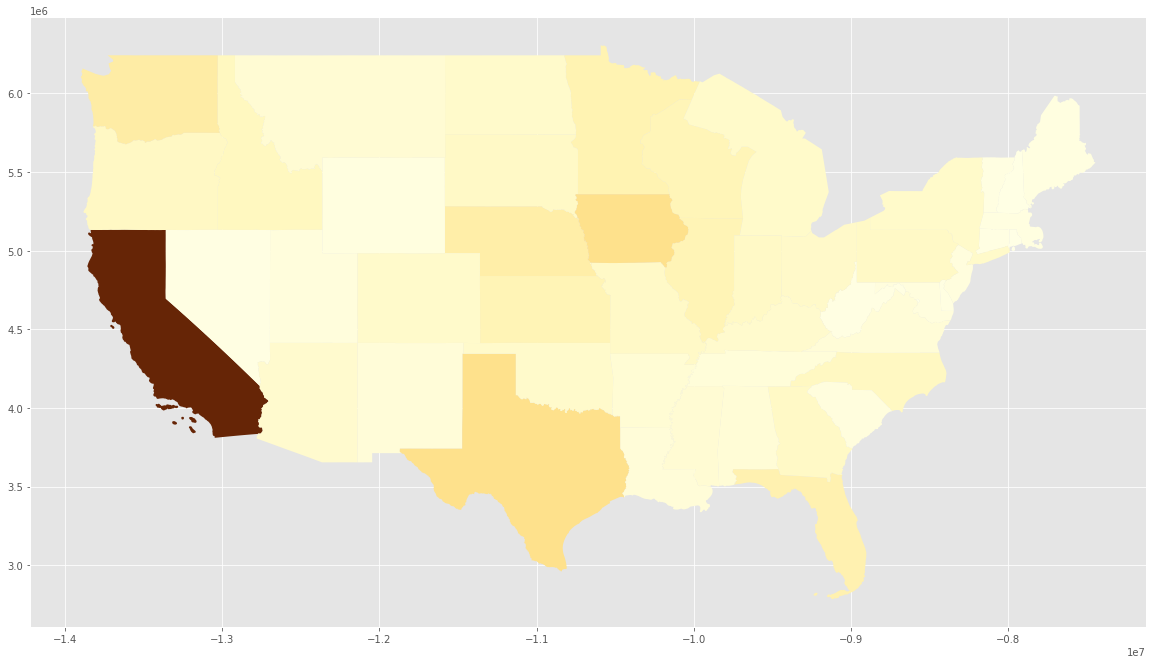

In [125]:
projected_agri_us_states_2019.plot(column='Agri GDP mil', colormap='YlOrBr')

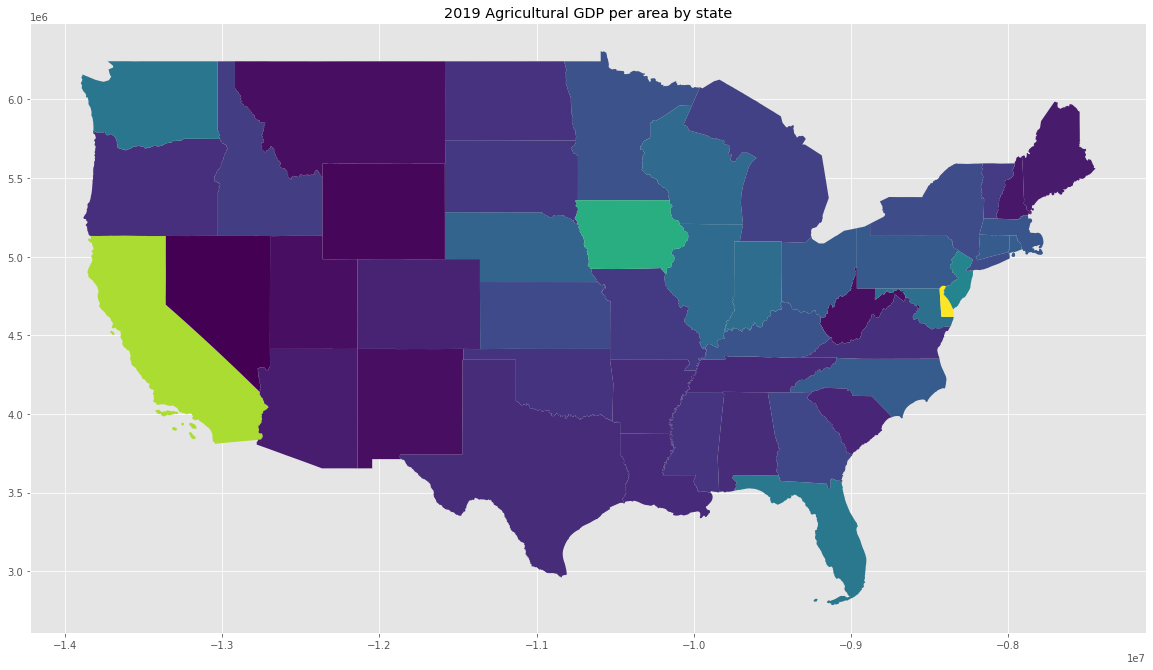

In [126]:
projected_agri_us_states_2019.plot(column='Agri GDP per area')
plt.title('2019 Agricultural GDP per area by state')
plt.savefig('./data/agri_gdp.png')

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:561: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  FutureWarning,


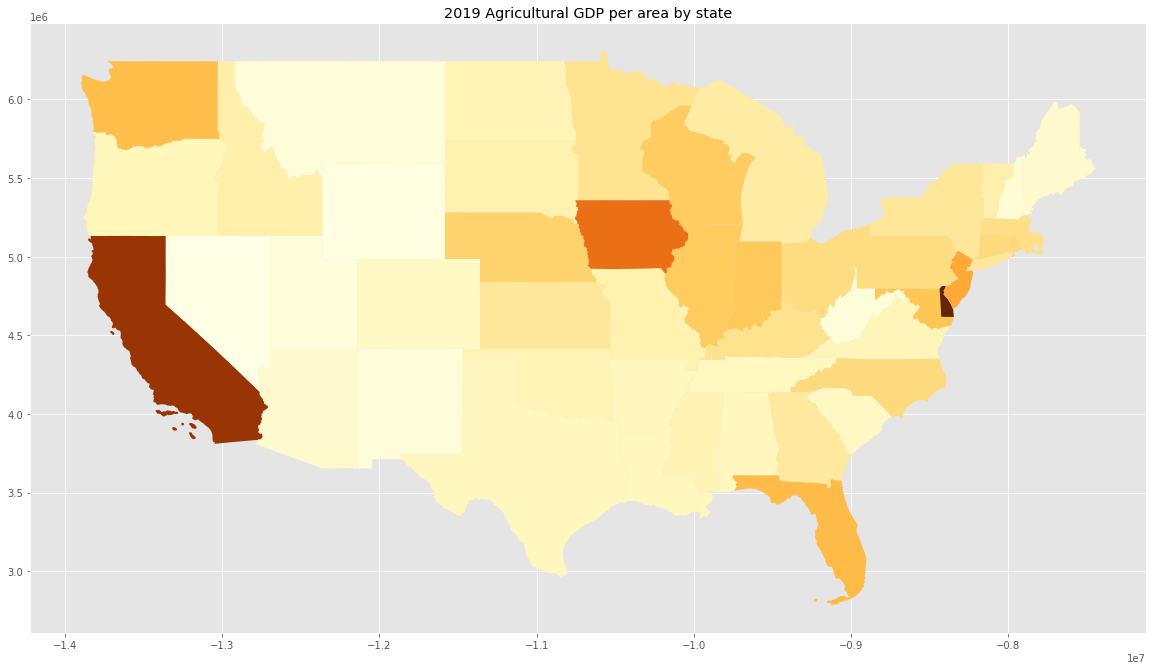

In [127]:
projected_agri_us_states_2019.plot(column='Agri GDP per area', colormap='YlOrBr')
plt.title('2019 Agricultural GDP per area by state')
plt.savefig('./data/agri_gdp_yellow.png')

In [128]:
import numpy as np
import matplotlib

In [129]:
# Convenience functions for working with colour ramps and bars
def colorbar_index(ncolors, cmap, labels=None, **kwargs):
    """
    This is a convenience function to stop you making off-by-one errors
    Takes a standard colour ramp, and discretizes it,
    then draws a colour bar with correctly aligned labels
    """
    cmap = cmap_discretize(cmap, ncolors)
    mappable = plt.cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = matplotlib.pyplot.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    if labels:
        colorbar.set_ticklabels(labels)
    return colorbar

def cmap_discretize(cmap, N):
    """
    Return a discrete colormap from the continuous colormap cmap.

        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.

    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)

    """
    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0., 0., 0., 0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N + 1)
    cdict = {}
    for ki, key in enumerate(('red', 'green', 'blue')):
        cdict[key] = [(indices[i], colors_rgba[i - 1, ki], colors_rgba[i, ki]) for i in range(N+1)]
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d" % N, cdict, 1024)

In [130]:
!apt install libspatialindex-c4v5
!pip install pysal
from pysal.viz.mapclassify import Quantiles

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-c4v5 is already the newest version (1.8.5-5).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [131]:
breaks = Quantiles(
    projected_agri_us_states_2019['Agri GDP'].values,
    k=5)
print(breaks)

Quantiles                   

      Interval         Count
----------------------------
[    1.00,  1041.20] |    10
( 1041.20,  2624.20] |    10
( 2624.20,  4330.40] |     9
( 4330.40,  6428.40] |    10
( 6428.40, 51797.00] |    10


In [132]:
print(breaks.bins)


[ 1041.2  2624.2  4330.4  6428.4 51797. ]


In [133]:
bar_labels = ['<=%i'% b for b in breaks.bins]
print(bar_labels)

['<=1041', '<=2624', '<=4330', '<=6428', '<=51797']


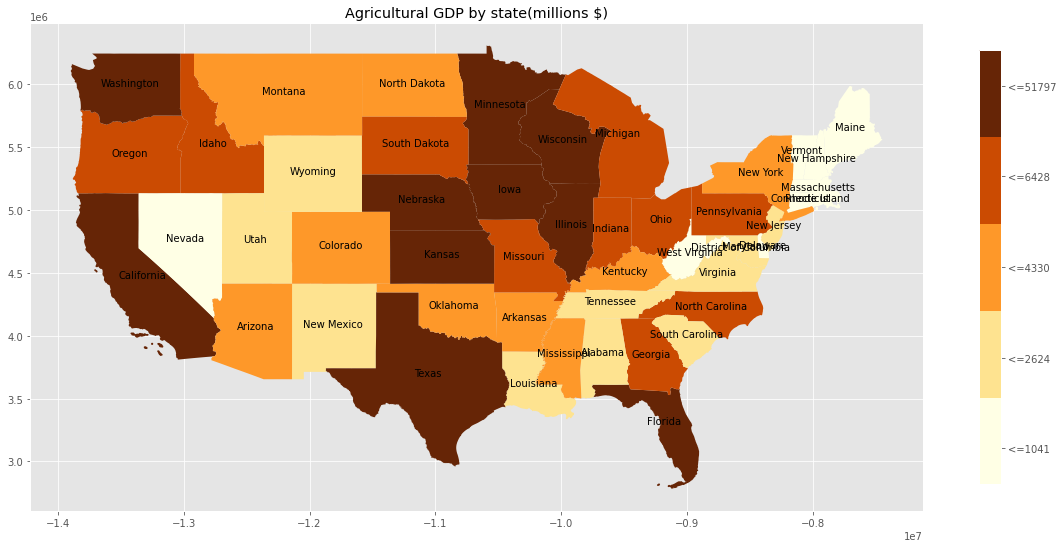

In [134]:
ax= projected_agri_us_states_2019.plot(column='Agri GDP', cmap='YlOrBr', scheme='quantiles', k=5)
projected_agri_us_states_2019.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
plt.title('Agricultural GDP by state(millions $)')

cmap = plt.get_cmap('YlOrBr')
colorbar_index(ncolors=5, cmap=cmap, shrink=0.5, labels=bar_labels)

In [146]:
#Filter data for year 2016.
agri_2005 = gdp_agri[gdp_agri['Year'] == 2005]
#Merge dataframes gdf and df_2016.
merged = projected_us_states.merge(agri_2005, left_on = 'NAME', right_on = 'State')

In [148]:
import json
#Read data to json.
merged_json = json.loads(merged.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

In [135]:
final_data = pd.read_csv('/content/final_data_table.csv')

In [136]:
final_data=final_data[final_data['OCC_TITLE']=='Farm, ranch, and other agricultural managers']

In [144]:
final_data.head()

,Unnamed: 0,Year,State_x,Area planted,Area harvested for grain,Yield,Production,GM corn area,Agri GDP,Normalised Agri GDP,All crops planted acreage,Agri exports,Corn exports,ST,OCC_TITLE,TOT_EMP,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,JOBS_1000,Population,N_TOT_EMP_1000,Acres operated in agriculture,N_GM_corn_area,N_agri_exports,N_corn_exports
0,0,2005,Illinois,12100000,11950000,143,1708850000,4356000,3923000000,145,23111000,3694000000,917000000,IL,"Farm, ranch, and other agricultural managers",160,24,49960,26,53770,NaN,12609903,0,27000000,0.16133,136.81481,33.96296
2,2,2005,Indiana,5900000,5770000,154,888580000,1534000,3334000000,223,12330000,1902000000,384000000,IN,"Farm, ranch, and other agricultural managers",50,22,47621,20,43580,NaN,6278616,0,14900000,0.10295,127.65101,25.77181
4,4,2005,Iowa,12800000,12500000,173,2162500000,7680000,7813000000,250,24680000,4402000000,920000000,IA,"Farm, ranch, and other agricultural managers",240,29,61200,25,51460,NaN,2964454,0,31200000,0.24615,141.08974,29.48718
6,6,2005,Kansas,3650000,3450000,135,465750000,2299000,5063000000,107,22711000,2205000000,194000000,KS,"Farm, ranch, and other agricultural managers",80,27,55910,29,60160,NaN,2745299,0,47160000,0.04875,46.75573,4.11366
10,10,2005,Missouri,3100000,2970000,111,329670000,1705000,3948000000,133,13444000,1696000000,170000000,MO,"Farm, ranch, and other agricultural managers",50,30,62360,26,54610,NaN,5790300,0,29500000,0.05780,57.49153,5.76271


In [137]:
final_data["Normalised Agri GDP"] = final_data["Normalised Agri GDP"].astype(float).astype(int)

In [138]:
final_data["TOT_EMP"] = final_data["TOT_EMP"].astype(float).astype(int)
final_data["H_MEAN"] = final_data["H_MEAN"].astype(float).astype(int)
final_data["A_MEAN"] = final_data["A_MEAN"].astype(float).astype(int)
final_data["H_MEDIAN"] = final_data["H_MEDIAN"].astype(float).astype(int)
final_data["A_MEDIAN"] = final_data["A_MEDIAN"].astype(float).astype(int)
final_data["N_TOT_EMP_1000"] = final_data["N_TOT_EMP_1000"].astype(float).astype(int)

In [139]:
us_states_merged = projected_us_states.merge(final_data, left_on='NAME', right_on='State_x', how='inner')

In [141]:
us_states_merged2019=us_states_merged[us_states_merged['Year']==2019]

In [143]:
us_states_merged2019.

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Unnamed: 0,Year,State_x,Area planted,Area harvested for grain,Yield,Production,GM corn area,Agri GDP,Normalised Agri GDP,All crops planted acreage,Agri exports,Corn exports,ST,OCC_TITLE,TOT_EMP,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN,JOBS_1000,Population,N_TOT_EMP_1000,Acres operated in agriculture,N_GM_corn_area,N_agri_exports,N_corn_exports
14,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143779863817,6215723896,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",265,2019,Illinois,10500000,10200000,181,1846200000,9765000,7431000000,275,21590000,7838000000,1177000000,IL,"Farm, ranch, and other agricultural managers",260,35,72040,30,61580,0.044,12671821,0,27000000,0.36167,290.29630,43.59259
23,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206230065476,18942261495,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",272,2019,Minnesota,7800000,7260000,174,1263240000,7020000,7913000000,310,18349000,6366000000,675000000,MN,"Farm, ranch, and other agricultural managers",40,50,103700,47,96940,0.015,5639632,0,25500000,0.27529,249.64706,26.47059
38,2,3,55,01779806,55,WI,Wisconsin,00,G4000,A,140293020078,29344176961,+44.6309071,-089.7093916,"POLYGON ((-92.88707 45.64415, -92.88671 45.644...",281,2019,Wisconsin,3800000,2680000,168,450240000,3382000,7182000000,502,7624000,2841000000,214000000,WI,"Farm, ranch, and other agricultural managers",80,36,73920,31,65060,0.027,5822434,0,14300000,0.23650,198.67133,14.96503
51,2,4,31,01779792,31,NE,Nebraska,00,G4000,A,198953801353,1374686302,+41.5433053,-099.8118646,"POLYGON ((-104.05264 42.00172, -104.05263 42.0...",276,2019,Nebraska,10100000,9810000,182,1785420000,9696000,9526000000,212,19176000,6293000000,958000000,NE,"Farm, ranch, and other agricultural managers",190,31,65180,29,61130,0.191,1934408,0,44900000,0.21595,140.15590,21.33630
66,2,3,39,01085497,39,OH,Ohio,00,G4000,A,105823701267,10274036690,+40.4149297,-082.7119975,"POLYGON ((-84.80325 40.98939, -84.80324 40.991...",278,2019,Ohio,2800000,2570000,164,421480000,2492000,4458000000,327,8595000,3509000000,300000000,OH,"Farm, ranch, and other agricultural managers",100,35,71850,32,66170,0.018,11689100,0,13600000,0.18324,258.01471,22.05882
81,3,7,48,01779801,48,TX,Texas,00,G4000,A,676668210823,18991880422,+31.4347032,-099.2818238,"POLYGON ((-103.98018 32.00012, -103.97994 32.0...",279,2019,Texas,2500000,2150000,133,285950000,2375000,13521000000,106,21419000,6300000000,166000000,TX,"Farm, ranch, and other agricultural managers",470,35,71830,32,66110,0.038,28995881,0,126500000,0.01877,49.80237,1.31225
87,2,4,38,01779797,38,ND,North Dakota,00,G4000,A,178695635183,4411365971,+47.4421740,-100.4608258,"POLYGON ((-104.04497 47.33014, -104.04496 47.3...",277,2019,North Dakota,3500000,3230000,141,455430000,3360000,4069000000,103,23221000,4088000000,209000000,ND,"Farm, ranch, and other agricultural managers",60,22,47621,20,43580,0.133,762062,0,39300000,0.08550,104.02036,5.31807
98,2,3,26,01779789,26,MI,Michigan,00,G4000,A,146608689865,103878116983,+44.8441768,-085.6604907,"POLYGON ((-86.46412 45.32481, -86.46452 45.324...",270,2019,Michigan,2000000,1610000,149,239890000,1780000,4343000000,443,5541000,2700000000,149000000,MI,"Farm, ranch, and other agricultural managers",90,32,65890,34,71530,0.021,9986857,0,9800000,0.18163,275.51020,15.20408
113,2,4,29,01779791,29,MO,Missouri,00,G4000,A,178049911275,2489250399,+38.3507500,-092.4567826,"POLYGON ((-94.60803 38.84721, -94.60803 38.849...",274,2019,Missouri,3200000,2990000,155,463450000,2912000,4664000000,168,12827000,3758000000,263000000,MO,"Farm, ranch, and other agricultural managers",100,34,70130,31,64570,0.034,6137428,0,27600000,0.10551,136.15942,9.52899
133,2,3,18,00448508,18,IN,Indiana,00,G4000,A,92790048198,1537252652,+39.9013136,-086.2919129,"POLYGON ((-87.52659 40.47688, -87.52658 40.478...",266,2019,Indiana,5000000,4820000,169,814580000,4350000,49090000